# **Import modules to attach and read the dataset**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


# **Read the dataset using pandas**

In [2]:
train_df=pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
train_df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [4]:
train_df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

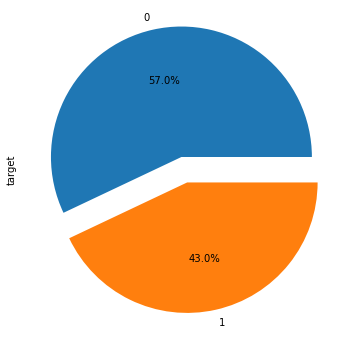

In [5]:
train_df["target"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%', figsize=(6,6))

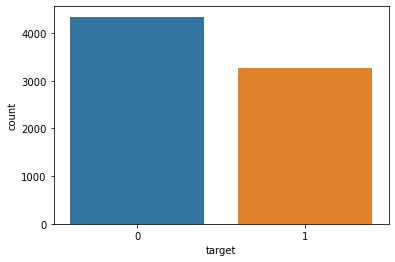

In [6]:
import seaborn as sns
sns.countplot(x='target',data=train_df)

In [7]:
train_df[train_df.keyword!='NaN'].value_counts()

id     keyword     location                        text                                                                                                                   target
10833  wrecked     Lincoln                         @engineshed Great atmosphere at the British Lion gig tonight. Hearing is wrecked. http://t.co/oMNBAtJEAO               0         1
3598   desolation  Stockholm, Sweden               ? This Weekend: Stockholm Sweden - Aug 8 at Copperfields http://t.co/6un7xC9Sve                                        1         1
3583   desolate    Michigan, USA                   Psalm34:22 The Lord redeemeth the soul of his servants: and none of them that trust in him shall be desolate.          0         1
3584   desolate    Boulder                         @joshacagan Your only option now is to move to an desolate island with nothing but a stack of DVDs you canÛªt watch.  0         1
3587   desolate    Temporary Towers                @fotofill It looks so desolate. End of the w

In [8]:
train_df=train_df.drop(["location","keyword","id"], axis=1)
train_df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
train_df.isna().sum()

text      0
target    0
dtype: int64

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


# **Read the test dataset**

In [11]:
test_df=pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [12]:
test_df.isna().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [13]:
test_df=test_df.drop(["location","keyword"], axis=1)
test_df.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


# **Import the required NLTK modules**

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import tokenize

# **Lower case the text data**

In [15]:
train_df.text=train_df.text.apply(lambda x: x.lower())
train_df

,text,target
0,our deeds are the reason of this #earthquake m...,1
1,forest fire near la ronge sask. canada,1
2,all residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,just got sent this photo from ruby #alaska as ...,1
...,...,...
7608,two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @thetawniest the out of control w...,1
7610,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...,1
7611,police investigating after an e-bike collided ...,1


# **Expanding the contracted and abbreviated text data**

In [16]:
!pip install contractions
import contractions

     |████████████████████████████████| 260 kB 1.2 MB/s 
     |████████████████████████████████| 321 kB 5.3 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.1-cp37-cp37m-linux_x86_64.whl size=102846 sha256=6c02943126a5764a8848234da66785907346b1db8a695dbad7b7e417e7da30bf
  Stored in directory: /root/.cache/pip/wheels/fe/ea/e6/38b0d734be6936b783e916a0d8d670313fb1b2f74c5889d4fe
Successfully built pyahocorasick
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [17]:
def con(data):
  expand=contractions.fix(data)
  return expand

train_df.text=train_df.text.apply(con)
train_df['text'][0]

'our deeds are the reason of this #earthquake may allah forgive us all'

# **Removing the punctuations and special characters**

In [18]:
import re

def remove_sp(data):
  pattern=r'[^A-Za-z0-9\s]'
  data=re.sub(pattern,'',data)
  return data

train_df.text=train_df.text.apply(remove_sp)
train_df.text[0]

'our deeds are the reason of this earthquake may allah forgive us all'

In [19]:
#import string
#punctuations=list(string.punctuation)
#train_df.text=train_df.text.apply(lambda x : " ".join(x for x in x.split() if x not in punctuations))

# **Removing Stopwords**

In [20]:
nltk.download('stopwords')
stopword_list=stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

train_df.text=train_df.text.apply(lambda x : " ".join(x for x in x.split() if x not in stopword_list))
train_df['text'][5]

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'rockyfire update california hwy 20 closed directions due lake county fire cafire wildfires'

# **Tokenization**

In [21]:
nltk.download('punkt')
train_df['text']=train_df.text.apply(word_tokenize)
train_df['text'][0]


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us']

# **Lemmatization**

In [22]:
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()
train_df['text']=train_df.text.apply(lambda x:[lemmatizer.lemmatize(word) for word in x])
train_df.text

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       [deed, reason, earthquake, may, allah, forgive...
1           [forest, fire, near, la, ronge, sask, canada]
2       [resident, asked, shelter, place, notified, of...
3       [13000, people, receive, wildfire, evacuation,...
4       [got, sent, photo, ruby, alaska, smoke, wildfi...
                              ...                        
7608    [two, giant, crane, holding, bridge, collapse,...
7609    [ariaahrary, thetawniest, control, wild, fire,...
7610    [m194, 0104, utc5km, volcano, hawaii, httptcoz...
7611    [police, investigating, ebike, collided, car, ...
7612    [latest, home, razed, northern, california, wi...
Name: text, Length: 7613, dtype: object

In [23]:
train_df.text= train_df.text.astype(str)

In [24]:
train_df.head()

,text,target
0,"['deed', 'reason', 'earthquake', 'may', 'allah...",1
1,"['forest', 'fire', 'near', 'la', 'ronge', 'sas...",1
2,"['resident', 'asked', 'shelter', 'place', 'not...",1
3,"['13000', 'people', 'receive', 'wildfire', 'ev...",1
4,"['got', 'sent', 'photo', 'ruby', 'alaska', 'sm...",1


# ** Creating the features and the target variables**

In [25]:
X=train_df.text
Y=train_df.target
X_test=test_df.text

In [26]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.pipeline import Pipeline
#from sklearn.svm import SVC

# **Applying TFIDF (Term Frequency Inverse Document Frequency) Vectorizer to convert categorical features into numbers**

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(X)


# **Applying Support Vector Machine Classifier**

In [28]:
np.random.seed(42)
from sklearn.svm import SVC
svc_clf=SVC()
svc_clf.fit(x_train_tfidf,Y)
svc_clf.score(x_train_tfidf,Y)

0.9726783134112702

In [29]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train_tfidf,Y)
rf_clf.score(x_train_tfidf,Y)

0.996453434913963

In [30]:
from mlxtend.classifier import StackingCVClassifier
scv=StackingCVClassifier(classifiers=[svc_clf,rf_clf],meta_classifier= rf_clf)
scv.fit(x_train_tfidf,Y)
scv.score(x_train_tfidf,Y)

0.9929068698279259

In [31]:
np.random.seed(42)
from sklearn import linear_model
rd_clf = linear_model.RidgeClassifier()
rd_clf.fit(x_train_tfidf,Y)
rd_clf.score(x_train_tfidf,Y)

0.9674241429134376

In [32]:

X_test=X_test.apply(lambda x: x.lower())
X_test=X_test.apply(con)
X_test=X_test.apply(remove_sp)
#test_df.text=test_df.text.apply(lambda x : " ".join(x for x in x.split() if x not in punctuations))
X_test=X_test.apply(lambda x : " ".join(x for x in x.split() if x not in stopword_list))
X_test=X_test.apply(word_tokenize)
X_test=X_test.apply(lambda x:[lemmatizer.lemmatize(word) for word in x])
X_test= X_test.astype(str)
x_test_tfidf = tfidf.transform(X_test)
X_test
x_test_tfidf

<3263x20866 sparse matrix of type '<class 'numpy.float64'>'
	with 25102 stored elements in Compressed Sparse Row format>

In [33]:
predictions=rd_clf.predict(x_test_tfidf)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [34]:
output = pd.DataFrame({'Id': test_df.id, 'Target': predictions})
output.to_csv('my_submission.csv', index=False)